In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Nationals players

nationals_data = master_data.loc[master_data["Franchise"] == "Nationals"]

#Only showing players that signed with the Nationals

signed_nationals_data = nationals_data.loc[nationals_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_nationals_data.groupby("Year")

#Unsigned Nationals draft picks

unsigned_nationals_data = nationals_data.loc[nationals_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
2000    67.7
1977    60.2
2005    46.3
2010    46.1
1972    44.5
2007    39.4
2011    37.3
2009    36.1
1985    35.4
1994    31.5
1990    30.7
1975    30.7
1988    29.7
1991    20.3
1979    18.2
1996    18.2
2004    16.6
1987    16.3
1992    14.2
1998    13.5
1973    13.5
2008    13.1
1976    12.8
1970     9.4
1983     9.2
1984     8.7
1989     7.6
1978     7.4
1980     6.3
1969     6.2
1986     5.7
1999     5.7
1995     5.6
1993     5.2
2012     4.7
2013     4.5
1997     3.8
1982     3.4
2002     2.0
2006     1.9
2003     1.9
1971     1.7
2015     0.3
1981     0.1
2019     0.0
2018     0.0
2017     0.0
1968     0.0
2016    -0.2
1974    -0.4
2014    -0.5
2001    -1.2
Name: Total_WAR, dtype: float64

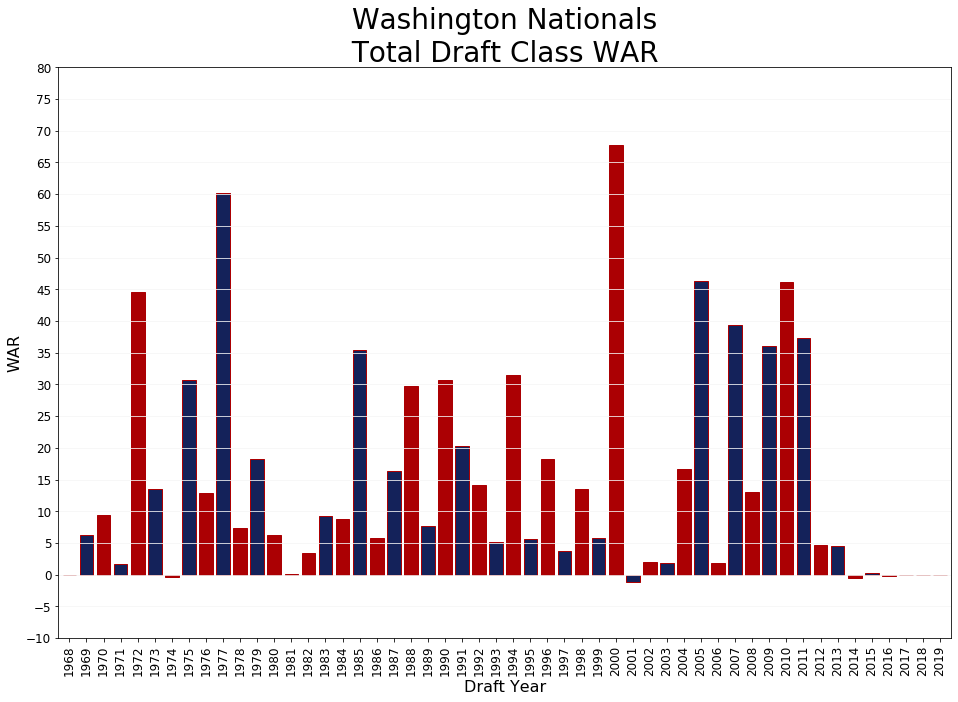

In [7]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#AB0003", "#14225A"], width = .8, fontsize = 12, edgecolor = "#AB0003", figsize = (16, 10.5))
plt.title("Washington Nationals\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Nationals WAR Total by Draft Year.png")
plt.show()

In [8]:
#Best draft picks in franchise history

signed_nationals_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
54705,2011,1,6,Nationals,Nationals,Y,Anthony Rendon,2013.0,rendoan01,12861.0,32.7,0.0,32.7,3B,4Yr,Rice University,Houston,TX,More than 25 WAR
8786,1975,11,250,Expos,Nationals,Y,Andre Dawson,1976.0,dawsoan01,1003091.0,30.7,0.0,30.7,OF,4Yr,Florida Agricultural and Mechanical University,Tallahassee,FL,More than 25 WAR
53175,2010,1,1,Nationals,Nationals,Y,Bryce Harper,2012.0,harpebr03,11579.0,30.5,0.0,30.5,OF,JC,College of Southern Nevada,Henderson,NV,More than 25 WAR
38371,2000,3,75,Expos,Nationals,Y,Grady Sizemore,2004.0,sizemgr01,2197.0,30.2,0.0,30.2,OF,HS,Cascade HS,Everett,WA,More than 25 WAR
28802,1994,5,140,Expos,Nationals,Y,Javier Vazquez,1998.0,vazquja01,801.0,1.6,26.6,28.2,RHP,HS,Colegio Ponceno HS,Ponce,PR,More than 25 WAR
6364,1972,3,53,Expos,Nationals,Y,Gary Carter,1974.0,cartega01,1002015.0,27.1,0.0,27.1,C,HS,Sunny Hills HS,Fullerton,CA,More than 25 WAR
10034,1977,5,106,Expos,Nationals,Y,Tim Raines,1979.0,raineti01,1406.0,26.5,0.0,26.5,SS,HS,Seminole HS,Sanford,FL,More than 25 WAR
45697,2005,1,4,Nationals,Nationals,Y,Ryan Zimmerman,2005.0,zimmery01,4220.0,26.1,0.0,26.1,3B,4Yr,University of Virginia,Charlottesville,VA,More than 25 WAR
51654,2009,1,1,Nationals,Nationals,Y,Stephen Strasburg,2010.0,strasst01,10131.0,0.8,22.7,23.5,RHP,4Yr,San Diego State University,San Diego,CA,20-25 WAR
16570,1985,2,36,Expos,Nationals,Y,Randy Johnson,1988.0,johnsra05,60.0,-0.1,22.3,22.2,LHP,4Yr,University of Southern California,Los Angeles,CA,20-25 WAR


In [11]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_nationals_data.loc[((signed_nationals_data["WAR Group"] == "Less than 5 WAR") |
(signed_nationals_data["WAR Group"] == "No Major League Experience")) & 
(signed_nationals_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
3563,1969,1,22,Expos,Nationals,Y,Balor Moore,1970.0,mooreba02,1009090.0,-0.5,4.5,4.0,LHP,HS,Deer Park HS,Deer Park,TX,Less than 5 WAR
4586,1970,1,3,Expos,Nationals,Y,Barry Foote,1973.0,footeba01,1004210.0,4.5,0.0,4.5,C,HS,Smithfield-Selma HS,Smithfield,NC,Less than 5 WAR
6316,1972,1,5,Expos,Nationals,Y,Bobby Goodman,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Bishop Byrnes HS,Memphis,TN,No Major League Experience
7858,1974,1,9,Expos,Nationals,Y,Ron Sorey,NaN,NaN,NaN,NaN,NaN,NaN,3B,HS,Stebbins HS,Dayton,OH,No Major League Experience
8546,1975,1,10,Expos,Nationals,Y,Art Miles,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,David Crockett HS,Austin,TX,No Major League Experience
9224,1976,1,9,Expos,Nationals,Y,Bob James,1978.0,jamesbo01,1006345.0,0.0,1.2,1.2,RHP,HS,Verdugo Hills HS,Sunland,CA,Less than 5 WAR
10712,1978,1,9,Expos,Nationals,Y,Glen Franklin,NaN,NaN,NaN,NaN,NaN,NaN,SS,JC,Chipola College,Marianna,FL,No Major League Experience
12374,1980,1,22,Expos,Nationals,Y,Terry Francona,1981.0,francte01,1004292.0,-0.5,0.0,-0.5,OF,4Yr,University of Arizona,Tucson,AZ,Less than 5 WAR
13202,1981,1,18,Expos,Nationals,Y,Darren Dilks,NaN,NaN,NaN,NaN,NaN,NaN,LHP,4Yr,Oklahoma State University,Stillwater,OK,No Major League Experience
14882,1983,1,14,Expos,Nationals,Y,Rich Stoll,NaN,NaN,NaN,NaN,NaN,NaN,RHP,4Yr,University of Michigan,Ann Arbor,MI,No Major League Experience


In [12]:
#Best unsigned draft picks in franchise history

unsigned_nationals_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
39331,2000,35,1035,Expos,Nationals,N,Russell Martin,2006.0,martiru01,4616.0,31.0,0.0,31.0,3B,HS,Polyvalente Edouard Montpetit,Montreal,QC,More than 25 WAR
13383,1981,8,199,Expos,Nationals,N,Mark McGwire,1986.0,mcgwima01,1008559.0,26.2,0.0,26.2,RHP,HS,Damien HS,La Verne,CA,More than 25 WAR
15040,1983,7,172,Expos,Nationals,N,Erik Hanson,1988.0,hansoer01,1005333.0,-0.1,24.6,24.5,RHP,HS,Peddie School,Hightstown,NJ,20-25 WAR
20963,1989,1,10,Expos,Nationals,N,Charles Johnson,1994.0,johnsch04,523.0,19.9,0.0,19.9,C,HS,Westwood HS,Fort Pierce,FL,15-20 WAR
5362,1970,35,779,Expos,Nationals,N,Roy Smalley,1975.0,smallro02,1012078.0,19.3,0.0,19.3,SS,HS,Westchester HS,Los Angeles,CA,15-20 WAR
13078,1980,30,726,Expos,Nationals,N,Chris Sabo,1988.0,saboch01,1011357.0,17.0,0.0,17.0,3B,HS,Detroit Catholic Central HS,Novi,MI,15-20 WAR
52185,2009,18,532,Nationals,Nationals,N,Marcus Stroman,2014.0,stromma01,13431.0,-0.1,15.8,15.7,SS,HS,Patchogue-Medford HS,Medford,NY,15-20 WAR
4760,1970,8,176,Expos,Nationals,N,Phil Garner,1973.0,garneph01,1004541.0,14.6,0.0,14.6,INF,4Yr,University of Tennessee,Knoxville,TN,10-15 WAR
8714,1975,8,178,Expos,Nationals,N,Mike Boddicker,1980.0,boddimi01,1001111.0,0.0,14.2,14.2,RHP,HS,Norway HS,Norway,IA,10-15 WAR
8281,1974,19,434,Expos,Nationals,N,Hubie Brooks,1980.0,brookhu01,1001472.0,11.3,0.0,11.3,SS,HS,Dominguez HS,Compton,CA,10-15 WAR


In [13]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_nationals_data.loc[signed_nationals_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
8786,1975,11,250,Expos,Nationals,Y,Andre Dawson,1976.0,dawsoan01,1003091.0,30.7,0.0,30.7,OF,4Yr,Florida Agricultural and Mechanical University,Tallahassee,FL,More than 25 WAR
38941,2000,22,645,Expos,Nationals,Y,Jason Bay,2003.0,bayja01,1717.0,20.5,0.0,20.5,OF,4Yr,Gonzaga University,Spokane,WA,20-25 WAR
53530,2010,12,356,Nationals,Nationals,Y,Robbie Ray,2014.0,rayro02,11486.0,-0.1,12.2,12.1,LHP,HS,Brentwood HS,Brentwood,TN,10-15 WAR
24225,1991,11,295,Expos,Nationals,Y,Mark Grudzielanek,1995.0,grudzma01,653.0,9.2,0.0,9.2,SS,JC,Trinidad State Junior College,Trinidad,CO,5-10 WAR
24407,1991,18,477,Expos,Nationals,Y,Kirk Rueter,1993.0,rueteki01,1128.0,-0.4,9.6,9.2,LHP,4Yr,Murray State University,Murray,KY,5-10 WAR
21467,1989,20,514,Expos,Nationals,Y,F.P. Santangelo,1995.0,santaf.01,1011438.0,7.9,0.0,7.9,SS,4Yr,University of Miami,Coral Gables,FL,5-10 WAR
32432,1996,14,400,Expos,Nationals,Y,Jamey Carroll,2002.0,carroja01,1591.0,6.2,0.0,6.2,SS,4Yr,University of Evansville,Evansville,IN,5-10 WAR
46047,2005,12,354,Nationals,Nationals,Y,Craig Stammen,2009.0,stammcr01,7274.0,0.6,4.7,5.3,RHP,4Yr,University of Dayton,Dayton,OH,5-10 WAR
9704,1976,21,489,Expos,Nationals,Y,David Palmer,1978.0,palmeda01,1009970.0,-0.4,5.6,5.2,RHP,HS,Glens Falls HS,Glens Falls,NY,5-10 WAR
46017,2005,11,324,Nationals,Nationals,Y,John Lannan,2007.0,lannajo01,7080.0,-0.5,5.2,4.7,LHP,4Yr,Siena College,Loudonville,NY,Less than 5 WAR


In [14]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(nationals_data["Year"], nationals_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1968,46.7,33.3,20.0
1969,16.7,75.0,8.3
1970,2.6,92.3,5.1
1971,15.8,76.3,7.9
1972,3.3,86.7,10.0
1973,20.7,69.0,10.3
1974,20.5,64.1,15.4
1975,31.0,62.1,6.9
1976,38.1,57.1,4.8


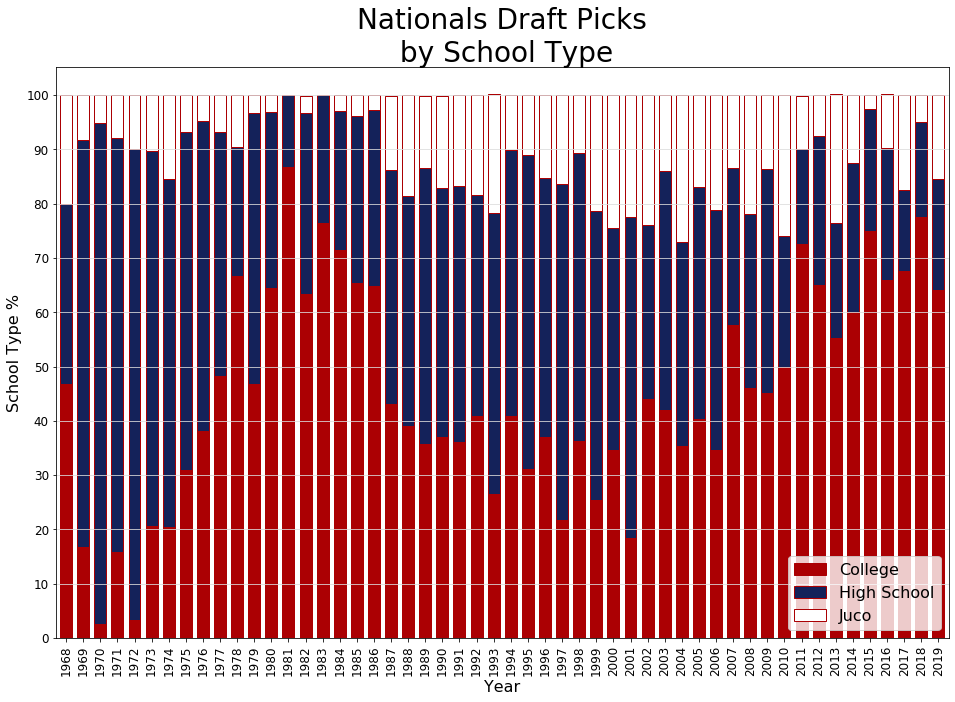

In [15]:
#Bar chart of table above

colors = ["#AB0003", "#14225A", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#AB0003", stacked = True, figsize = (16, 10.5))
plt.title("Nationals Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Nationals Draft Picks by School Type.png")
plt.show()